<a href="https://colab.research.google.com/github/Someshwarms/Air-Quality-Index-and-Condition-Prediction-using-ML/blob/main/Air_Quality_Index_and_Condition_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import xgboost 

**Importing all the files,packages and importing dataset**

In [2]:
df=pd.read_csv("/content/drive/MyDrive/station_day.csv")
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [3]:
df.columns

Index(['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [4]:
df.shape

(108035, 16)

In [5]:
df.isnull().sum()
#As we can see there is too many null values we have to replace all these null values with median value of the each column.

StationId         0
Date              0
PM2.5         21625
PM10          42706
NO            17106
NO2           16547
NOx           15500
NH3           48105
CO            12998
SO2           25204
O3            25568
Benzene       31455
Toluene       38702
Xylene        85137
AQI           21010
AQI_Bucket    21010
dtype: int64

**As we can see there is too many null values we have to replace all these null values with mean or median or mode value of the each column.**

In [6]:
median1=df['PM2.5'].median()
print(median1)
median2=df['PM10'].median()
print(median2)
median3=df['NO'].median()
print(median3)
median4=df['NO2'].median()
print(median4)
median5=df['NOx'].median()
print(median5)
median6=df['NH3'].median()
print(median6)
median7=df['CO'].median()
print(median7)
median8=df['SO2'].median()
print(median8)
median9=df['O3'].median()
print(median9)
median10=df['Benzene'].median()
print(median10)
median11=df['Toluene'].median()
print(median11)
median12=df['Xylene'].median()
print(median12)
median13=df['AQI'].median()
print(median13)

55.95
122.09
10.29
27.21
26.66
23.59
0.91
8.95
30.84
1.21
4.33
0.4
132.0


In [7]:
df['PM2.5'].fillna(median1,inplace=True)

In [8]:
df['PM10'].fillna(median2,inplace=True)

In [9]:
df['NO'].fillna(median3,inplace=True)

In [10]:
df['NO2'].fillna(median4,inplace=True)

In [11]:
df['NOx'].fillna(median5,inplace=True)

In [12]:
df['NH3'].fillna(median6,inplace=True)

In [13]:
df['CO'].fillna(median7,inplace=True)

In [14]:
df['SO2'].fillna(median8,inplace=True)

In [15]:
df['O3'].fillna(median9,inplace=True)

In [16]:
df['Benzene'].fillna(median10,inplace=True)

In [17]:
df['Toluene'].fillna(median11,inplace=True)

In [18]:
df['Xylene'].fillna(median12,inplace=True)

In [19]:
df['AQI'].fillna(median13,inplace=True)

In [20]:
df.isnull().sum()

StationId         0
Date              0
PM2.5             0
PM10              0
NO                0
NO2               0
NOx               0
NH3               0
CO                0
SO2               0
O3                0
Benzene           0
Toluene           0
Xylene            0
AQI               0
AQI_Bucket    21010
dtype: int64

**And Replacing null values as 'Missing' in case of categorical column**

In [21]:
df['AQI_Bucket'].value_counts()

Moderate        29417
Satisfactory    23636
Very Poor       11762
Poor            11493
Good             5510
Severe           5207
Name: AQI_Bucket, dtype: int64

In [22]:
df['AQI_Bucket'].fillna('Missing',inplace=True)

In [23]:
df.isnull().sum()

StationId     0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [24]:
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,132.0,Missing
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


**Taking care of date column for prediction**

In [25]:
df['Day']=pd.to_datetime(df.Date,format="%Y-%m-%d").dt.day
df['Month']=pd.to_datetime(df.Date,format="%Y-%m-%d").dt.month
df['Year']=pd.to_datetime(df.Date,format="%Y-%m-%d").dt.year

In [26]:
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Day,Month,Year
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,132.0,Missing,24,11,2017
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate,25,11,2017
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate,26,11,2017
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate,27,11,2017
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate,28,11,2017


#**Data Visualization**

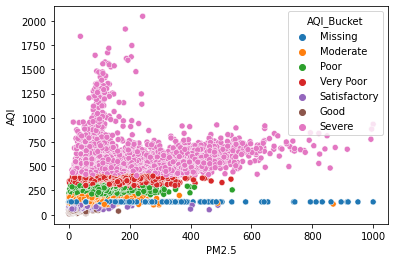

In [27]:
sns.scatterplot(x='PM2.5',y='AQI',hue='AQI_Bucket',data=df)

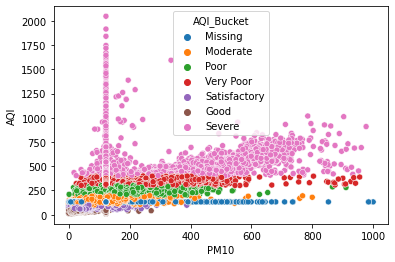

In [28]:
sns.scatterplot(x='PM10',y='AQI',hue='AQI_Bucket',data=df)

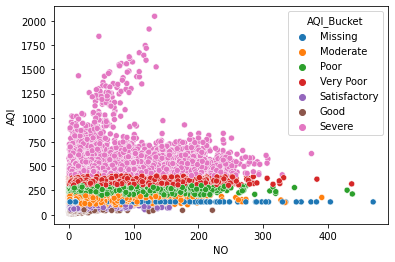

In [29]:
sns.scatterplot(x='NO',y='AQI',hue='AQI_Bucket',data=df)

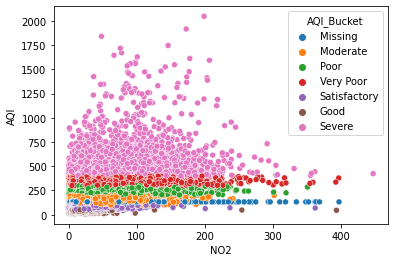

In [30]:
sns.scatterplot(x='NO2',y='AQI',hue='AQI_Bucket',data=df)

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


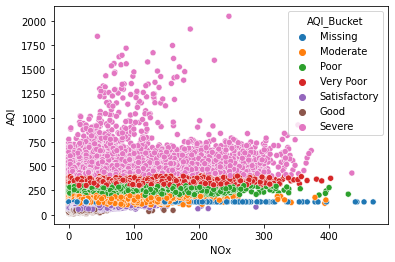

In [31]:
sns.scatterplot(x='NOx',y='AQI',hue='AQI_Bucket',data=df)

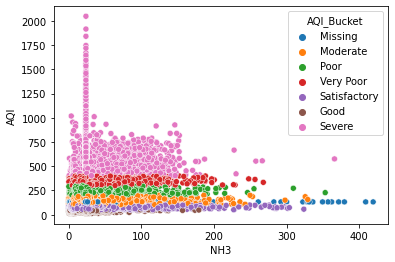

In [32]:
sns.scatterplot(x='NH3',y='AQI',hue='AQI_Bucket',data=df)

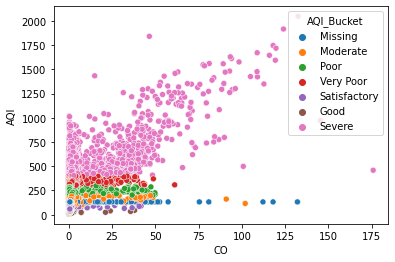

In [33]:
sns.scatterplot(x='CO',y='AQI',hue='AQI_Bucket',data=df)

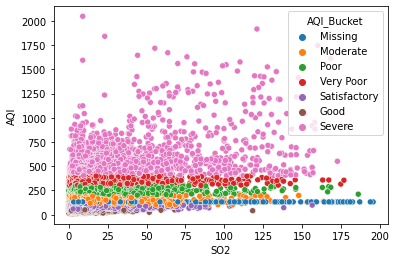

In [34]:
sns.scatterplot(x='SO2',y='AQI',hue='AQI_Bucket',data=df)

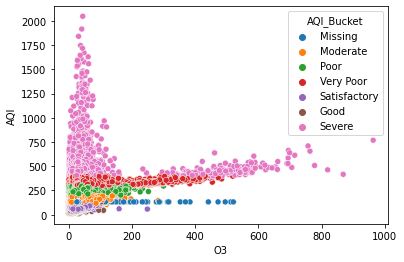

In [35]:
sns.scatterplot(x='O3',y='AQI',hue='AQI_Bucket',data=df)

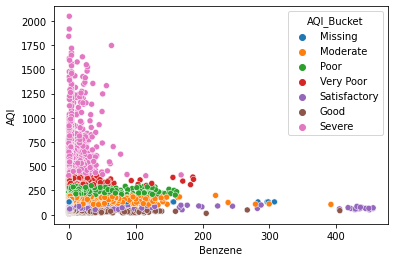

In [36]:
sns.scatterplot(x='Benzene',y='AQI',hue='AQI_Bucket',data=df)

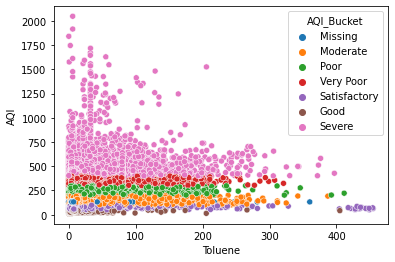

In [37]:
sns.scatterplot(x='Toluene',y='AQI',hue='AQI_Bucket',data=df)

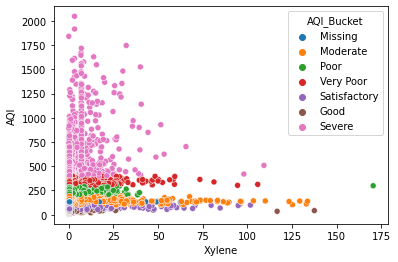

In [38]:
sns.scatterplot(x='Xylene',y='AQI',hue='AQI_Bucket',data=df)

**Replacing Categoricl Values into Numerical values**

In [39]:
df['AQI_Bucket'].value_counts()

Moderate        29417
Satisfactory    23636
Missing         21010
Very Poor       11762
Poor            11493
Good             5510
Severe           5207
Name: AQI_Bucket, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


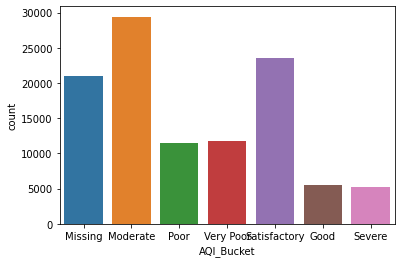

In [40]:
sns.countplot('AQI_Bucket',data=df)

In [41]:
#lets make the categorical value into numerical value
df['AQI_Bucket'].replace(to_replace="Missing",value=0,inplace=True)
df['AQI_Bucket'].replace(to_replace="Moderate",value=1,inplace=True)
df['AQI_Bucket'].replace(to_replace="Poor",value=2,inplace=True)
df['AQI_Bucket'].replace(to_replace="Very Poor",value=3,inplace=True)
df['AQI_Bucket'].replace(to_replace="Satisfactory",value=4,inplace=True)
df['AQI_Bucket'].replace(to_replace="Good",value=5,inplace=True)
df['AQI_Bucket'].replace(to_replace="Severe",value=6,inplace=True)

In [42]:
df['AQI_Bucket'].value_counts()

1    29417
4    23636
0    21010
3    11762
2    11493
5     5510
6     5207
Name: AQI_Bucket, dtype: int64

In [43]:
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Day,Month,Year
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,132.0,0,24,11,2017
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,1,25,11,2017
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,1,26,11,2017
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,1,27,11,2017
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,1,28,11,2017


**Seperating dataset into independent and dependent feature  for regression and classification both**

In [44]:
X=df.drop(['StationId','Date','AQI_Bucket'],axis=1)#classification independent
y=df['AQI_Bucket']#classification dependent
W=df.drop(['StationId','Date','AQI'],axis=1)#Regression independent
z=df['AQI']#Regression dependent

**Appling Correaltion to check is there any Columns which are correalted to each other if there it will be get droped**

In [45]:
X.corr()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Day,Month,Year
PM2.5,1.000000,0.689865,0.475926,0.430728,0.456854,0.334874,0.089130,0.164388,0.133146,0.105547,0.262099,0.014183,0.793215,-0.021349,0.084810,-0.076423
PM10,0.689865,1.000000,0.475274,0.415650,0.489424,0.348346,0.065876,0.192791,0.063613,0.106865,0.314234,-0.012207,0.692166,-0.017317,0.040399,-0.040993
NO,0.475926,0.475274,1.000000,0.572610,0.850129,0.295311,0.130215,0.168216,0.029948,0.143590,0.259061,0.010639,0.469517,-0.007297,0.055484,0.012204
NO2,0.430728,0.415650,0.572610,1.000000,0.694988,0.330701,0.172530,0.277746,0.215619,0.114045,0.285210,0.082606,0.474933,-0.004156,0.024624,-0.033734
NOx,0.456854,0.489424,0.850129,0.694988,1.000000,0.313174,0.130318,0.197838,0.108883,0.149844,0.243740,0.021693,0.483184,-0.009282,0.037878,-0.004552
NH3,0.334874,0.348346,0.295311,0.330701,0.313174,1.000000,0.037150,0.079512,0.099755,0.036483,0.173028,-0.050312,0.314119,-0.006532,0.009104,-0.078937
CO,0.089130,0.065876,0.130215,0.172530,0.130318,0.037150,1.000000,0.355839,0.013817,0.054529,0.118493,0.118008,0.402749,-0.001457,-0.001923,-0.117539
SO2,0.164388,0.192791,0.168216,0.277746,0.197838,0.079512,0.355839,1.000000,0.137527,0.069165,0.209961,0.163223,0.342670,-0.000663,-0.038217,0.019306
O3,0.133146,0.063613,0.029948,0.215619,0.108883,0.099755,0.013817,0.137527,1.000000,0.012108,0.101639,0.002803,0.174652,-0.006968,-0.043669,-0.029865
Benzene,0.105547,0.106865,0.143590,0.114045,0.149844,0.036483,0.054529,0.069165,0.012108,1.000000,0.420456,0.103685,0.113580,-0.000520,0.016912,0.046046


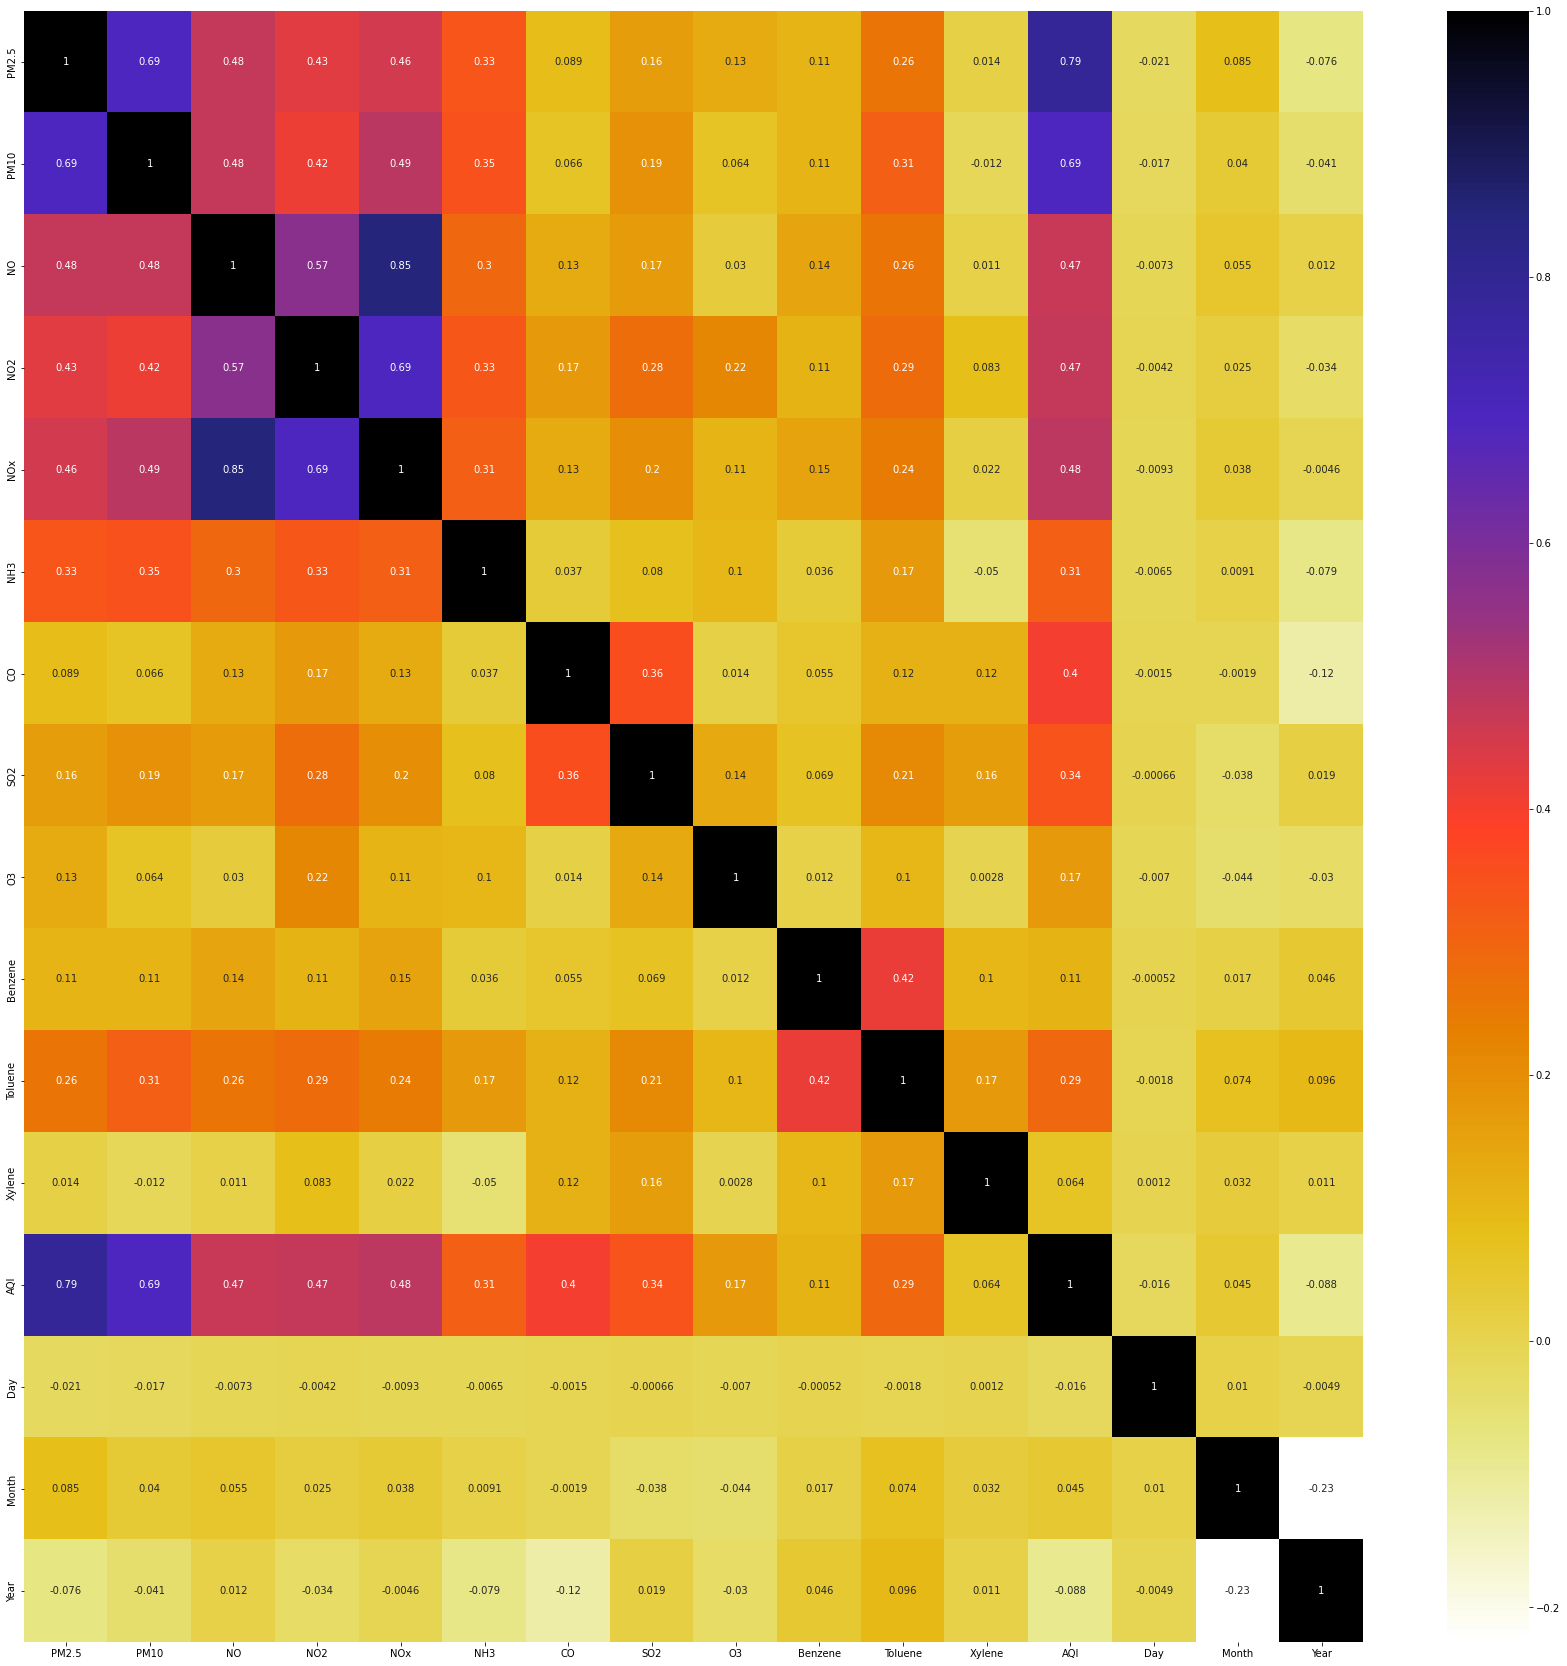

In [46]:
plt.figure(figsize=(30,30))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [47]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [48]:
corr_features = correlation(X, 0.9)
len(set(corr_features))

0

In [49]:
corr_features

set()

**Diving data independent and dependent feature for training and testing for regression and classification both**

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)#for classification
X_train1,X_test1,y_train1,y_test1=train_test_split(W,z,test_size=0.3,random_state=42)#for regression

In [51]:
X_train.shape

(75624, 16)

In [52]:
y_train.shape

(75624,)

In [53]:
X_test.shape

(32411, 16)

In [54]:
y_test.shape

(32411,)

In [55]:
X_train.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Day,Month,Year
69271,35.45,78.48,43.56,19.28,62.85,28.95,1.27,3.58,30.84,3.90,5.24,0.73,89.0,31,1,2020
14196,55.95,122.09,10.29,27.21,26.66,23.59,0.91,8.95,30.84,1.21,4.33,0.40,132.0,9,10,2015
38054,27.94,42.69,2.01,6.34,8.33,53.27,0.55,6.20,19.66,0.10,0.48,0.40,50.0,22,6,2020
25339,32.17,60.83,6.30,41.11,26.97,46.34,0.70,5.08,22.32,1.40,49.18,0.40,56.0,15,7,2018
78088,93.41,244.58,22.13,18.51,26.93,11.43,1.84,38.31,42.60,0.00,0.00,0.40,148.0,26,3,2018


In [56]:
y_train.head()

69271    4
14196    0
38054    5
25339    4
78088    1
Name: AQI_Bucket, dtype: int64

In [57]:
X_train1.shape

(75624, 16)

In [58]:
y_train1.shape

(75624,)

In [59]:
X_test1.shape

(32411, 16)

In [60]:
y_test1.shape

(32411,)

In [61]:
X_train1.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI_Bucket,Day,Month,Year
69271,35.45,78.48,43.56,19.28,62.85,28.95,1.27,3.58,30.84,3.90,5.24,0.73,4,31,1,2020
14196,55.95,122.09,10.29,27.21,26.66,23.59,0.91,8.95,30.84,1.21,4.33,0.40,0,9,10,2015
38054,27.94,42.69,2.01,6.34,8.33,53.27,0.55,6.20,19.66,0.10,0.48,0.40,5,22,6,2020
25339,32.17,60.83,6.30,41.11,26.97,46.34,0.70,5.08,22.32,1.40,49.18,0.40,4,15,7,2018
78088,93.41,244.58,22.13,18.51,26.93,11.43,1.84,38.31,42.60,0.00,0.00,0.40,1,26,3,2018


In [62]:
y_train1.head()

69271     89.0
14196    132.0
38054     50.0
25339     56.0
78088    148.0
Name: AQI, dtype: float64

#**For Classification Modelling**
**i.RandomForest Classifier**

**ii.GradientBoost Classifier**


**iii.Logistic Regression**

**iv.XGBoost Classifier**

**v.Naive_Bayes**

**vi.SVM**

In [63]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [64]:
y_pred

array([2, 2, 4, ..., 3, 0, 4])

In [65]:
print("Accuracy Score:\n",accuracy_score(y_pred,y_test)*100)
print("Confusion Matrix:\n",confusion_matrix(y_pred,y_test))
print("Classification Report:\n",classification_report(y_pred,y_test))

Accuracy Score:
 99.71306038073493
Confusion Matrix:
 [[6193   56    0    0    0    0    0]
 [  36 8768    0    0    0    0    0]
 [   0    0 3489    0    0    0    0]
 [   0    0    0 3597    0    0    1]
 [   0    0    0    0 7022    0    0]
 [   0    0    0    0    0 1664    0]
 [   0    0    0    0    0    0 1585]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6249
           1       0.99      1.00      0.99      8804
           2       1.00      1.00      1.00      3489
           3       1.00      1.00      1.00      3598
           4       1.00      1.00      1.00      7022
           5       1.00      1.00      1.00      1664
           6       1.00      1.00      1.00      1585

    accuracy                           1.00     32411
   macro avg       1.00      1.00      1.00     32411
weighted avg       1.00      1.00      1.00     32411



In [66]:
model1=xgboost.XGBClassifier()
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)

In [67]:
y_pred1

array([2, 2, 4, ..., 3, 0, 4])

In [68]:
print("Accuracy Score:\n",accuracy_score(y_pred1,y_test)*100)
print("Confusion Matrix:\n",confusion_matrix(y_pred1,y_test))
print("Classification Report:\n",classification_report(y_pred1,y_test))

Accuracy Score:
 99.67912128598316
Confusion Matrix:
 [[6222   97    0    0    0    0    0]
 [   7 8727    0    0    0    0    0]
 [   0    0 3489    0    0    0    0]
 [   0    0    0 3597    0    0    0]
 [   0    0    0    0 7022    0    0]
 [   0    0    0    0    0 1664    0]
 [   0    0    0    0    0    0 1586]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      6319
           1       0.99      1.00      0.99      8734
           2       1.00      1.00      1.00      3489
           3       1.00      1.00      1.00      3597
           4       1.00      1.00      1.00      7022
           5       1.00      1.00      1.00      1664
           6       1.00      1.00      1.00      1586

    accuracy                           1.00     32411
   macro avg       1.00      1.00      1.00     32411
weighted avg       1.00      1.00      1.00     32411



In [69]:
model2=GradientBoostingClassifier()
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)

In [70]:
y_pred2

array([2, 2, 4, ..., 3, 0, 4])

In [71]:
print("Accuracy Score:\n",accuracy_score(y_pred2,y_test)*100)
print("Confusion Matrix:\n",confusion_matrix(y_pred2,y_test))
print("Classification Report:\n",classification_report(y_pred2,y_test))

Accuracy Score:
 99.70071889173428
Confusion Matrix:
 [[6218   86    0    0    0    0    0]
 [  11 8738    0    0    0    0    0]
 [   0    0 3489    0    0    0    0]
 [   0    0    0 3597    0    0    0]
 [   0    0    0    0 7022    0    0]
 [   0    0    0    0    0 1664    0]
 [   0    0    0    0    0    0 1586]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      6304
           1       0.99      1.00      0.99      8749
           2       1.00      1.00      1.00      3489
           3       1.00      1.00      1.00      3597
           4       1.00      1.00      1.00      7022
           5       1.00      1.00      1.00      1664
           6       1.00      1.00      1.00      1586

    accuracy                           1.00     32411
   macro avg       1.00      1.00      1.00     32411
weighted avg       1.00      1.00      1.00     32411



In [72]:
min=MinMaxScaler()
X_train_scaled=min.fit_transform(X_train)
X_test_scaled=min.transform(X_test)

In [73]:
model3=LogisticRegression()
model3.fit(X_train_scaled,y_train)
y_pred3=model3.predict(X_test_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [74]:
y_pred3

array([2, 3, 4, ..., 3, 0, 4])

In [75]:
print("Accuracy Score:\n",accuracy_score(y_pred3,y_test)*100)
print("Confusion Matrix:\n",confusion_matrix(y_pred3,y_test))
print("Classification Report:\n",classification_report(y_pred3,y_test))

Accuracy Score:
 72.15451544228812
Confusion Matrix:
 [[4224 1240  295    2  459   12    0]
 [1773 6606  686    0  535    0    0]
 [  12   44 2090  428    0    0   27]
 [  26    5  418 3094    2    0  429]
 [ 118  894    0    0 5770 1180    0]
 [  71   35    0    0  256  472    0]
 [   5    0    0   73    0    0 1130]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68      6232
           1       0.75      0.69      0.72      9600
           2       0.60      0.80      0.69      2601
           3       0.86      0.78      0.82      3974
           4       0.82      0.72      0.77      7962
           5       0.28      0.57      0.38       834
           6       0.71      0.94      0.81      1208

    accuracy                           0.72     32411
   macro avg       0.67      0.74      0.69     32411
weighted avg       0.74      0.72      0.73     32411



In [76]:
model4=MultinomialNB()
model4.fit(X_train,y_train)
y_pred4=model4.predict(X_test)

In [77]:
y_pred4

array([2, 3, 4, ..., 2, 0, 5])

In [78]:
print("Accuracy Score:\n",accuracy_score(y_pred4,y_test)*100)
print("Confusion Matrix:\n",confusion_matrix(y_pred4,y_test))
print("Classification Report:\n",classification_report(y_pred4,y_test))

Accuracy Score:
 62.25664126376847
Confusion Matrix:
 [[5117 3515  418    1  542    1    0]
 [ 717 3341  186    1  454    3    0]
 [ 136  971 2259  906    0    0   60]
 [  58   42  593 2092    2    0  373]
 [ 182  942    0    0 4907  351    0]
 [  10   12    0    0 1109 1309    0]
 [   9    1   33  597    8    0 1153]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.53      0.65      9594
           1       0.38      0.71      0.49      4702
           2       0.65      0.52      0.58      4332
           3       0.58      0.66      0.62      3160
           4       0.70      0.77      0.73      6382
           5       0.79      0.54      0.64      2440
           6       0.73      0.64      0.68      1801

    accuracy                           0.62     32411
   macro avg       0.66      0.62      0.63     32411
weighted avg       0.68      0.62      0.63     32411



In [79]:
model5=SVC(kernel="rbf")
model5.fit(X_train,y_train)
y_pred5=model5.predict(X_test)

In [80]:
y_pred5

array([2, 3, 4, ..., 3, 1, 4])

In [81]:
print("Accuracy Score:\n",accuracy_score(y_pred5,y_test)*100)
print("Confusion Matrix:\n",confusion_matrix(y_pred5,y_test))
print("Classification Report:\n",classification_report(y_pred5,y_test))

Accuracy Score:
 78.07225941809878
Confusion Matrix:
 [[1254  296    3    0   12    0    0]
 [4975 8225  118    0  225    0    0]
 [   0   21 3151   24    0    0    0]
 [   0    0  217 3562    0    0  137]
 [   0  282    0    0 6781  782    0]
 [   0    0    0    0    4  882    0]
 [   0    0    0   11    0    0 1449]]
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.80      0.32      1565
           1       0.93      0.61      0.74     13543
           2       0.90      0.99      0.94      3196
           3       0.99      0.91      0.95      3916
           4       0.97      0.86      0.91      7845
           5       0.53      1.00      0.69       886
           6       0.91      0.99      0.95      1460

    accuracy                           0.78     32411
   macro avg       0.78      0.88      0.79     32411
weighted avg       0.90      0.78      0.81     32411



**Accuracy given by different modelling techniques or Algorithms for classification:**

**i.RandomForest=99.71%**

**ii.XGBoost=99.67%**

**iii.GradientBoosting=99.70%**

**iv.Logistic Regression=72.15%**

**v.Naive_Bayes=62.6%**

**vi.SVM=78.07%**

#**For Regression Modelling:**
**i.RandomForest**

**ii.Adaboost**

**iii.Gradientboosting**

**iv.XGBoost**

**v.Linear Regression**

**vi.SVM**

In [82]:
rdm=RandomForestRegressor()
rdm.fit(X_train1,y_train1)
pred1=rdm.predict(X_test1)

In [83]:
pred1

array([283.29, 276.37,  58.41, ..., 341.53, 132.  ,  71.14])

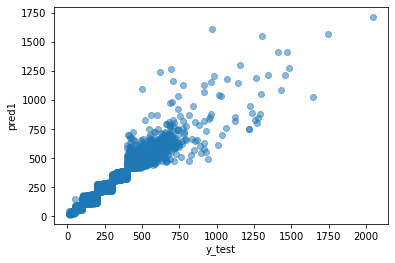

In [84]:
plt.scatter(y_test1, pred1, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("pred1")
plt.show()

In [85]:
print("MSE:",mean_squared_error(pred1,y_test1))
print("MAE:",mean_absolute_error(pred1,y_test1))
print("RMSE:",np.sqrt(mean_squared_error(pred1,y_test1)))

MSE: 544.1324399971556
MAE: 11.38423949320557
RMSE: 23.326646565615807


In [86]:
XGB=xgboost.XGBRegressor()
XGB.fit(X_train1,y_train1)
pred2=XGB.predict(X_test1)

[08:56:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [87]:
pred2

array([249.29079, 261.78757,  73.39736, ..., 326.9905 , 128.73262,
        72.81318], dtype=float32)

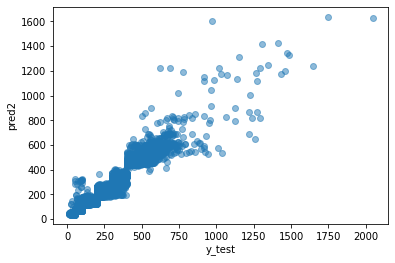

In [88]:
plt.scatter(y_test1, pred2, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("pred2")
plt.show()

In [89]:
print("MSE:",mean_squared_error(pred2,y_test1))
print("MAE:",mean_absolute_error(pred2,y_test1))
print("RMSE:",np.sqrt(mean_squared_error(pred2,y_test1)))

MSE: 669.5151312462923
MAE: 14.960337288439769
RMSE: 25.874990458863792


In [90]:
min=MinMaxScaler()
X_train_scaled1=min.fit_transform(X_train1)
X_test_scaled1=min.transform(X_test1)

In [91]:
lr=LinearRegression()
lr.fit(X_train_scaled1,y_train1)
pred3=lr.predict(X_test_scaled1)

In [92]:
pred3

array([166.40745308, 247.96452674, 103.82391133, ..., 244.56412239,
       128.1885083 ,  75.6507722 ])

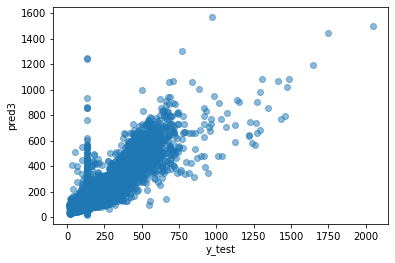

In [93]:
plt.scatter(y_test1, pred3, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("pred3")
plt.show()

In [94]:
print("MSE:",mean_squared_error(pred3,y_test1))
print("MAE:",mean_absolute_error(pred3,y_test1))
print("RMSE:",np.sqrt(mean_squared_error(pred3,y_test1)))

MSE: 2888.656327074241
MAE: 33.017278856239685
RMSE: 53.74622151439337


In [95]:
Ada=AdaBoostRegressor()
Ada.fit(X_train1,y_train1)
pred4=Ada.predict(X_test1)

In [96]:
pred4

array([228.35126219, 237.83453237,  69.51585895, ..., 306.77280994,
       150.42378154,  69.51585895])

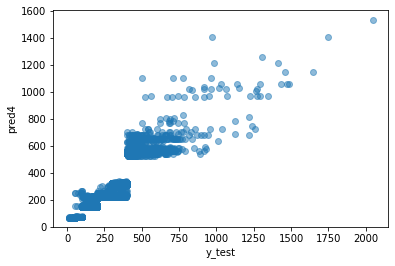

In [97]:
plt.scatter(y_test1, pred4, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("pred4")
plt.show()

In [98]:
print("MSE:",mean_squared_error(pred4,y_test1))
print("MAE:",mean_absolute_error(pred4,y_test1))
print("RMSE:",np.sqrt(mean_squared_error(pred4,y_test1)))

MSE: 1550.875430436995
MAE: 27.617219887580028
RMSE: 39.38115577832874


#**Conclusion:** 
**As we can see that for both classifcation and Regression Ensemble techniques performeed way better in case of classification the accuracy we got for ensemble techniques is of 99% while for regression also the results are excellent but to improve the result in case of regression we can apply Hyperparameter Tuning or optimization techniques like RandomizedSearchCV or GridSearchSearchCV to improve the result more.**

**In case of both regression and classification for prediction i am using Randomforest Classifier and regressor Model**

In [101]:
cla_prediction=model.predict([[66.22	,66.22	,4.33	,60.01	,35.43	,64.31	,0.75	,13.56	,178.47	,0.36	,1.44	,0.40	,276.0	,8	,7	,2018]])
if cla_prediction==1:
  print("Air Quality Index Moderate")
elif cla_prediction==2:
  print("Air Quality Index Poor")
elif cla_prediction==3:
  print("Air Quality Index Very Poor")
elif cla_prediction==4:
  print("Air Quality Index Satisfactory")
elif cla_prediction==5:
  print("Air Quality Index Good")
elif cla_prediction==6:
  print("Air Quality Index Severe")
else:
  print("Air Quality Index belong to other category")
reg_prediction=rdm.predict([[66.22	,66.22	,4.33	,60.01	,35.43	,64.31	,0.75	,13.56	,178.47	,0.36	,1.44	,0.40	,2	,8	,7	,2018]])
print("Air Quality Index Value:",reg_prediction)

Air Quality Index Poor
Air Quality Index Value: [283.29]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
